In [92]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt


In [93]:
# df=pd.read_csv('Titanic.csv')
csv_file='Titanic.csv'
df=pd.read_csv(csv_file)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
### q1 what is the shape of the dataset?
df.shape

(891, 12)

In [95]:
### q2. what are the different data types in the dataset?

df.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [96]:
## q3. Are there any missing or null values in the dataset?

print('There are many missing values in the data set in some columns. \nThe number of missing values in each column are given below :-')
print(pd.Series([df.shape[0] for i in range(df.shape[1])],index=df.columns) - df.count(axis=0))

There are many missing values in the data set in some columns. 
The number of missing values in each column are given below :-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [97]:
### q4 What are the statistics (mean, median, mode) of the numerical columns?

print('''Mean is :-\n''')
print(df.mean(numeric_only=True))
print('''\nMedian is :-\n''')
print(df.median(numeric_only=True))


def display_modes_of_each_df_column(df,numeric_only_var=False):
    print('most common values in the respective columns are :-\n')

    ### remove columns that have all entries unique

    mode_df=df.mode(axis=0,numeric_only=numeric_only_var)
    for col in mode_df.columns:
        if len(mode_df[col].dropna())==len(df[col]):
            mode_df.drop(columns=col,inplace=True)
    new_mode_df=mode_df.mode(axis=0,numeric_only=numeric_only_var)



    
    if not new_mode_df.shape[0]==1:
        ### nuanced way for when there multiple modes
        for col in new_mode_df.columns:
            modes_in_col_series=new_mode_df[col].dropna()
            modes_list=[mode for mode in modes_in_col_series]

            if len(modes_list) >1:
                print('most common values in ' ,col, ' are ',end='')
                for i in range(len(modes_list)-1):
                    print(modes_list[i],', '  )
                print(modes_list[len(modes_list)-1], end='\n')
            else:
                print('most common value in ' ,col, ' is ',end='')
                print(modes_list[0],end='\n')
    else:
        ### easy way
        print(new_mode_df.iloc[0,:])
    return None
        
display_modes_of_each_df_column(df,numeric_only_var=True)



Mean is :-

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

Median is :-

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
most common values in the respective columns are :-

Survived     0.00
Pclass       3.00
Age         24.00
SibSp        0.00
Parch        0.00
Fare         8.05
Name: 0, dtype: float64


In [98]:
## q5 What are the unique values and frequencies of the categorical columns?




# np.argwhere(boolmat==True)

desc_df=df.describe(include='all')

desc_df.loc[['unique','freq'],:].dropna(axis=1)
# desc_df

,Name,Sex,Ticket,Cabin,Embarked
unique,891,2,681,147,3
freq,1,577,7,4,644


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

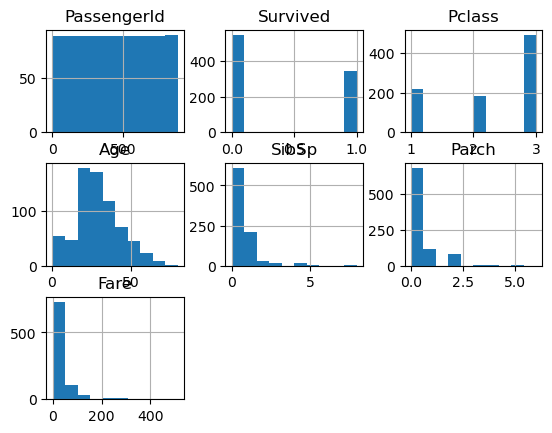

In [99]:
### q6 What is the distribution of the numerical columns?

df.hist()

In [100]:
### q7 Are there any outliers in the numerical columns? TODO
num_df=df.select_dtypes(include=np.number)
# num_df_titanic=num_df.drop(['PassengerId'],axis=1)
df_filtered=[]
for col in num_df.columns:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)

#     df_filtered[col] = df[(df["col"] < q_hi) & (df["col"] > q_low)]
    print(df[(df[col] < q_hi) & (df[col] > q_low)])

# desc_df

     PassengerId  Survived  Pclass  \
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
..           ...       ...     ...   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   

                                              Name     Sex   Age  SibSp  \
9              Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                 Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                        Bonnell, Miss. Elizabeth  female  58.0      0   
12                  Saundercock, Mr. William Henry    male  20.0      0   
13                     Andersson, Mr. Anders Johan    male  39.0      1   
..                                             ...     ...   ...    ...   
877               

In [101]:
### q8. Are there any correlations among the numerical columns?

def get_high_corr_column_pairs(df,high_corr=0.35,suppress_verbose_output=False):
    corr_df=df.corr()
    corr_df_ndarray=corr_df.values

    ## remove lower half triangle of repeated values 
    for i in range(corr_df_ndarray.shape[0]):
        j=i
        while j>=0:
            corr_df_ndarray[i][j]=np.NaN
            j=j-1

    # print(corr_df_ndarray)
    high_corr_index_bool= ((corr_df_ndarray > high_corr) | (corr_df_ndarray < -high_corr)) & (corr_df_ndarray != float(1))

    high_corr_index_list=np.argwhere(high_corr_index_bool)
    high_corr_columns_list=[]
    if suppress_verbose_output==False:
        print('columns with high correlation are :- ')
    for tup in high_corr_index_list:
        high_corr_columns_list.append((corr_df.index[tup[0]],corr_df.columns[tup[1]],np.round_(corr_df_ndarray[tup[0],tup[1]],decimals=3)))
        if suppress_verbose_output==False:
            print(corr_df.index[tup[0]],' has a signifcant correlation of', np.round_(corr_df_ndarray[tup[0],tup[1]],decimals=3),'with', corr_df.columns[tup[1]])
    return high_corr_columns_list
    
get_high_corr_column_pairs(df)

columns with high correlation are :- 
Pclass  has a signifcant correlation of -0.369 with Age
Pclass  has a signifcant correlation of -0.549 with Fare
SibSp  has a signifcant correlation of 0.415 with Parch


[('Pclass', 'Age', -0.369),
 ('Pclass', 'Fare', -0.549),
 ('SibSp', 'Parch', 0.415)]

In [102]:
## q9.Are there any patterns in the date or time columns?



if csv_file=='HappyCars.csv':

    df_copy=pd.DataFrame.copy(df)

    df_copy['BirthDate']=pd.to_datetime(df['BirthDate'])
    print(df_copy['BirthDate'].hist())
    print(df_copy['BirthDate'].describe())
elif csv_file=='Titanic.csv':
    print('''
    There is no date column in this dataset.
    ''')


# df_copy['BirthDate'].dtypes


# df_copy['BirthDate']=pd.to_datetime(df['BirthDate'],format='%s')
# df_copy['BirthDate']=pd.to_numeric(df_copy['BirthDate'])
# for tup in get_high_corr_column_pairs(df_copy,suppress_verbose_output=True):
#     if 'BirthDate' in tup:
#         print(tup[0],' has a signifcant correlation of', tup[2],'with', tup[1])


    There is no date column in this dataset.
    


In [103]:
### q10 Are there any duplicated rows in the dataset?

print('There are ',len(np.argwhere(df.duplicated().values)), ' duplicated rows in the dataset')

There are  0  duplicated rows in the dataset


In [104]:
### q11 Are there any unusual or unexpected values in the dataset?

print('There are ',len(np.argwhere(df.isna().values)),' NaN values in the Dataset')

There are  866  NaN values in the Dataset


In [105]:
### q12 What is the range of values for each numerical column?

import numpy as np
# import 

max_series=df.max(axis=0,numeric_only=True)
# print('min of each column :-')
min_series=df.min(axis=0,numeric_only=True)
range_series=max_series.copy(deep=True)
indices_to_remove=[]
for i in range(len(range_series)):
    if not (type(max_series[i])==np.bool_) and not(type(min_series[i])==np.bool_): 
#         range_series.append((max_series[i]-min_series[i]))
        range_series[i]=(max_series[i]-min_series[i])
    else:
        indices_to_remove.append(i)

range_series.drop(labels=[range_series.index[n] for n in indices_to_remove],inplace=True)

# range_series.drop(labels=indices_to_remove,inplace=True)


print(range_series)

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


In [106]:
### q13 What are the minimum and maximum values for each numerical column?
df.describe().loc[['min','max'],:]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0000
max,891.0,1.0,3.0,80.00,8.0,6.0,512.3292


In [107]:
### q14 What are the most common values in each categorical column?


print('most common values in the respective columns are :-')

### remove columns that have all entries unique

mode_df=df.mode(axis=0)
for col in mode_df.columns:
    if len(mode_df[col].dropna())==len(df[col]):
        mode_df.drop(columns=col,inplace=True)
new_mode_df=mode_df.mode(axis=0)



### nuanced way for when there multiple modes
if not new_mode_df.shape[0]==1:
    for col in new_mode_df.columns:
        modes_in_col_series=new_mode_df[col].dropna()
        modes_list=[mode for mode in modes_in_col_series]

        if len(modes_list) >1:
            print('most common values in ' ,col, ' are ',end='')
            for i in range(len(modes_list)-1):
                print(modes_list[i],', '  )
            print(modes_list[len(modes_list)-1], end='\n')
        else:
            print('most common value in ' ,col, ' is ',end='')
            print(modes_list[0],end='\n')
else:
    
    ### EASY WAY
    print(new_mode_df.iloc[0,:])

most common values in the respective columns are :-
most common value in  Survived  is 0.0
most common value in  Pclass  is 3.0
most common value in  Sex  is male
most common value in  Age  is 24.0
most common value in  SibSp  is 0.0
most common value in  Parch  is 0.0
most common values in  Ticket  are 1601 , 
347082 , 
CA. 2343
most common value in  Fare  is 8.05
most common values in  Cabin  are B96 B98 , 
C23 C25 C27 , 
G6
most common value in  Embarked  is S


In [108]:
### q15 Are there any errors or inconsistencies in the data?


# print(np.argwhere(df.NumberChildrenAtHome.values > df.TotalChildren.values))
if csv_file=='HappyCars.csv':
    for i in np.argwhere(df.NumberChildrenAtHome.values > df.TotalChildren.values).flatten():
        print('NumberChildrenAtHome,viz. ',df.NumberChildrenAtHome.iloc[i] , ' is greater than TotalChildren, viz.', df.TotalChildren.iloc[i], 'for the row index', i)
elif csv_file=='Titanic.csv':
    print('''
    No inconsistencies were noticed in this dataset.
    '''
    
    )
    
# print(df.CustomerID.nunique())
    

# print('There are ',len(np.argwhere(df.isna().values)),' NaN values in the Dataset')
# print('There are ',len(np.argwhere(df.duplicated().values)), ' duplicated rows in the dataset')


    No inconsistencies were noticed in this dataset.
    


In [109]:
### q16 Are there any discrepancies in the data?

if csv_file=='HappyCars.csv':
    for i in np.argwhere(df.NumberChildrenAtHome.values > df.TotalChildren.values).flatten():
        print('NumberChildrenAtHome,viz. ',df.NumberChildrenAtHome.iloc[i] , ' is greater than TotalChildren, viz.', df.TotalChildren.iloc[i], 'for the row index', i)
elif csv_file=='Titanic.csv':
    print('''
    No discrepancies were noticed in this dataset.
    '''
    
    )


    No discrepancies were noticed in this dataset.
    


In [110]:
### q17 What are the column names in the dataset?
for col in df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [111]:
### q18 How many rows and columns are in the dataset?
print('there are ',df.shape[0], 'rows and ',df.shape[1],'columns')

there are  891 rows and  12 columns


In [112]:
### q19 What are the different levels of the categorical columns? ### did not understand the question

In [113]:
### q20 What are the unique values for each categorical column?
df.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [114]:
### q21 Are there any columns that are not informative or useful for analysis?

## check
if csv_file=='HappyCars.csv':
    print('''
I assume that the given dataset refers to a dataset gathered by a business to find the correlation between the 
various personal data of their customers and the profit that the customer generates for the business. This may be
done so that the business focus their attention and marketing on customers with qualities that are correlated
with higher profits for the business.

In this regard, only the column MiddleName seems irrelevant to the analysis since there is a unique customerID
for each customer anyway and there is little use in storing the middle name of the customer.

''')
elif csv_file=='Titanic.csv':
    print()

In [115]:
### q22 Are there any columns that need to be transformed or cleaned before analysis?

if csv_file=='HappyCars.csv':
    print('''
CommuteDistance column should be converted to a numerical column by including only numbers 
BirthDate should be transformed to date datatype by using pd.to_datetime function


''')
elif csv_file=='Titanic.csv':
    print()

In [116]:
### q23 Are there any columns that can be dropped from the dataset?
if csv_file=='HappyCars.csv':
    print('''
I assume that the given dataset refers to a dataset gathered by a business to find the correlation between the 
various personal data of their customers and the profit that the customer generates for the business. This may be
done so that the business focus their attention and marketing on customers with qualities that are correlated
with higher profits for the business.

In this regard, only the column MiddleName seems irrelevant to the analysis since there is a unique customerID
for each customer anyway and there is little use in storing the middle name of the customer.

''')
elif csv_file=='Titanic.csv':
    print('''
    Parch and SibSp columns can be dropped since it is not understood what this data stands for.
    
    '''
    
    )


    Parch and SibSp columns can be dropped since it is not understood what this data stands for.
    
    


In [117]:
### q24 Are there any columns that can be used as identifiers or keys for merging or joining other datasets?
if csv_file=='HappyCars.csv':
    print('''
CustomerID column can be used as a unique identifier.

''')
elif csv_file=='Titanic.csv':
    print('''
    PassengerId column can be used as a unique identifier.
    ''')


    PassengerId column can be used as a unique identifier.
    


In [118]:
### q25 Are there any columns that can be used as target variables for prediction or classification tasks? TODO

if csv_file=='HappyCars.csv':
    print('''
    It would be useful to predict the ProfitGenerated column from the rest of the data.
''')
elif csv_file=='Titanic.csv':
    print('''
    It would be useful to predict the Survived column from the rest of the data.
    ''')






    It would be useful to predict the Survived column from the rest of the data.
    


In [119]:

### appendix



'''
# print(np.where(df['Cabin']=='B96') 
# boolmat=df['Cabin']=='B98'
# print(boolmat)
# print(df.loc[:,'Cabin'].loc[:,df.loc[:,'Cabin']=='B98'])
# print(df.loc[:,'Cabin'][df.loc[:,'Cabin']=='B96 B98'])
# print(pd.where(df=='B96 B98')) ### does not work
# print(df=='B96 B98')
boolmat= (df.values=='B96 B98')
print(np.argwhere(boolmat))
argwhere_output_list=np.argwhere(boolmat)
print([(df.index[coord[0]],df.columns[coord[1]],df.iloc[coord[0],coord[1]]) for coord in argwhere_output_list ])

# print(type(df.columns))
# print(type(df.Cabin[df.Cabin=='B96 B98'].index))


import re
### TODO commute distance 'Miles' makes the column not numerical
for string in df['CommuteDistance']:
    re.search(pattern='Miles',   str(string))
    
'''
''''''
# pd.read_csv('Titanic.csv')

''

In [120]:
# pd.read_csv('HappyCars.csv')